In [50]:
import torch
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker


# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cmap = 'plasma_r'

In [51]:
folder_loc = '/vast/sr6364/perturbed_organics/data/phase_diagram/delocalized'
folder_name = 'delocalized_goe_symmetric_N_100_s_100_mu_0.0_num_delta_100_num_input_100_num_trials_250_b0_1.0_b1_1.0_phase_diagram'
path = os.path.join(folder_loc, folder_name)

In [52]:
# Load parameters from the JSON file
param_file_path = os.path.join(path, 'parameters.json')
with open(param_file_path, 'r') as f:
    params = json.load(f)

# Extract parameters
N = params['N']
num_tasks = params['num_tasks']
num_delta = params['num_delta']
num_input = params['num_input']
num_trials = params['num_trials']
delta_range = np.array(params['delta_range'])
input_range = np.array(params['input_range'])

In [53]:
bool_stable = torch.load(os.path.join(path, f'bool_stable.pt'))
norm_fixed_point_y = torch.load(os.path.join(path, f'norm_fixed_point_y.pt'))
actual_fixed_point_y = torch.load(os.path.join(path, f'actual_fixed_point_y.pt'))
first_order_perturb_y = torch.load(os.path.join(path, f'first_order_perturb_y.pt'))

In [73]:
# Proceed with plotting or further analysis
bool_stable = bool_stable.bool()
percent_stable = bool_stable.float().mean(dim=2) * 100
percent_unstable = 100 - percent_stable

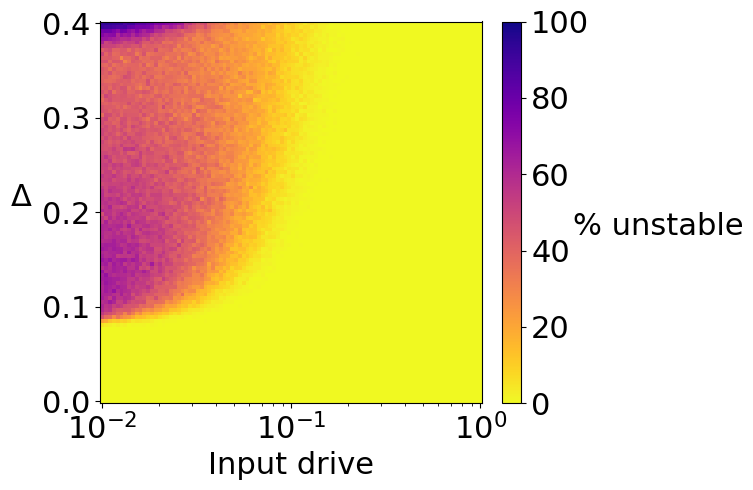

In [80]:
plt.figure(figsize=(7.5, 5))
norm = mcolors.Normalize(vmin=0, vmax=100, clip=False)
mesh = plt.pcolormesh(input_range, delta_range, percent_unstable, cmap=cmap, norm=norm)
plt.xscale('log')  # Ensure the axis is in log scale
colorbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"% unstable", fontsize=22, rotation=0, labelpad=50)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Set the aspect ratio so that grid cells are square:
ax = plt.gca()
x_span = np.log10(input_range[-1]) - np.log10(input_range[0])
y_span = delta_range[-1] - delta_range[0]
ax.set_aspect(x_span / y_span, adjustable='box')

plt.tight_layout()
plt.savefig(f'../figures/fig4/percent_unstable.png', bbox_inches='tight')
plt.savefig(f'../figures/fig4/percent_unstable.svg', format='svg', bbox_inches='tight', dpi=300)
plt.show()


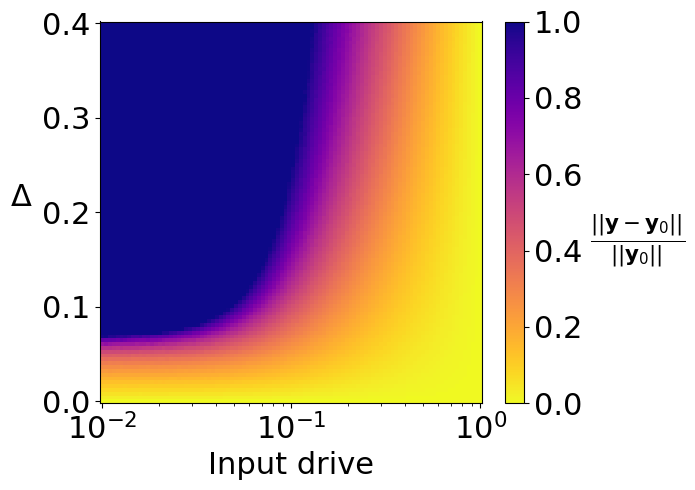

In [79]:
plt.figure(figsize=(7.5, 5))

norm = mcolors.Normalize(vmin=0, vmax=1, clip=False)

# calculate the avg ratio of deviation from norm fixed point for y
y1_squared_norm = torch.norm(norm_fixed_point_y - actual_fixed_point_y, dim=3) ** 2
y0_squared_norm = torch.norm(norm_fixed_point_y, dim=3) ** 2
y_ratio = y1_squared_norm / y0_squared_norm
# y_ratio_mean = torch.sqrt(torch.mean(y_ratio, dim=2))
y_ratio_mean = torch.sqrt(torch.nanmean(y_ratio, dim=2))

mesh = plt.pcolormesh(input_range, delta_range, y_ratio_mean, cmap=cmap, norm=norm)
plt.xscale('log')  # Ensure the axis is in log scale
colorbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.ax.set_ylabel(r"$\frac{||\mathbf{y}-\mathbf{y}_0||}{||\mathbf{y}_0||}$", fontsize=22, rotation=0, labelpad=40)
plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
# plt.title("Actual Mean Ratio of Norm Difference for y", fontsize=22)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Set the aspect ratio so that grid cells are square:
ax = plt.gca()
x_span = np.log10(input_range[-1]) - np.log10(input_range[0])
y_span = delta_range[-1] - delta_range[0]
ax.set_aspect(x_span / y_span, adjustable='box')
plt.tight_layout()
plt.savefig(f'../figures/fig4/norm_ratio.png', bbox_inches='tight')
plt.savefig(f'../figures/fig4/norm_ratio.svg', format='svg', bbox_inches='tight', dpi=300)
plt.show()